In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import kaggle

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [4]:
api = KaggleApi()
api.authenticate()

In [5]:
import kaggle

# Download the dataset
!kaggle datasets download -d syedanwarafridi/vehicle-sales-data

Dataset URL: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data
License(s): MIT
vehicle-sales-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile

# Unzip the file
with zipfile.ZipFile('vehicle-sales-data.zip', 'r') as zip_ref:
    zip_ref.extractall('vehicle_sales_data')

In [7]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('vehicle_sales_data/car_prices.csv')

# Take a look at the first few rows
print(df.head())

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors ameri

In [8]:
# Check the shape of the dataset (rows, columns)
print(df.shape)

# See the columns in the dataset
print(df.columns)

# Get a quick summary of the dataset
print(df.info())

# See basic statistics
print(df.describe())

(558837, 16)
Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr

In [9]:
# Check for missing values
print(df.isnull().sum())

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [10]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


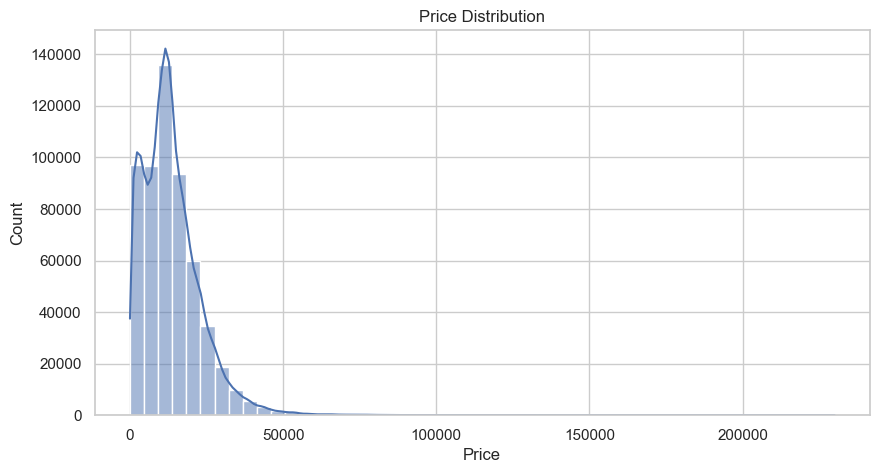

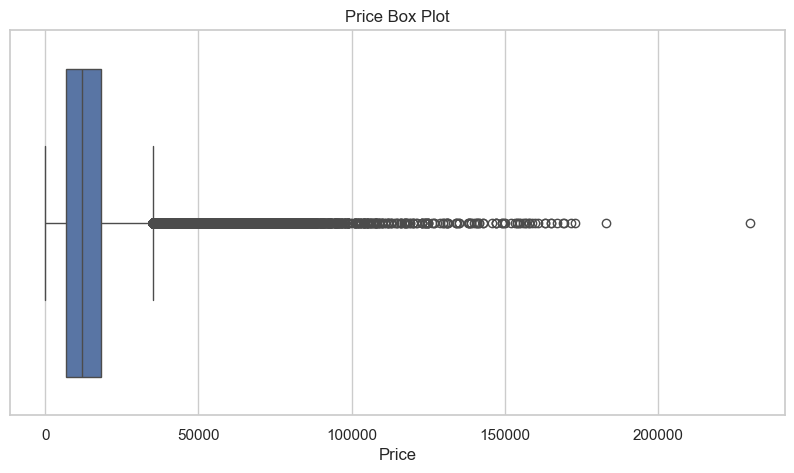

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("vehicle_sales_data/car_prices.csv")

# Set plot style
sns.set(style="whitegrid")

# Histogram
plt.figure(figsize=(10,5))
sns.histplot(df['sellingprice'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# Box Plot
plt.figure(figsize=(10,5))
sns.boxplot(x=df['sellingprice'])
plt.title("Price Box Plot")
plt.xlabel("Price")
plt.show()

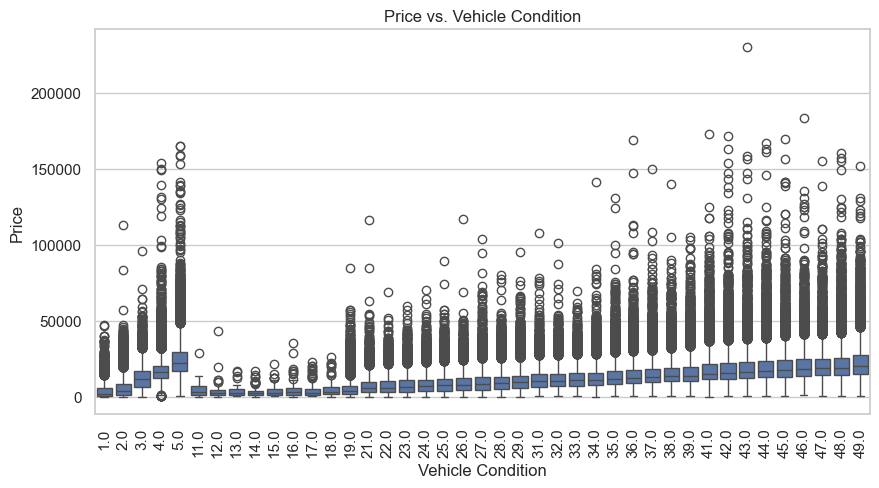

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['condition'], y=df['sellingprice'])
plt.title("Price vs. Vehicle Condition")
plt.xlabel("Vehicle Condition")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()


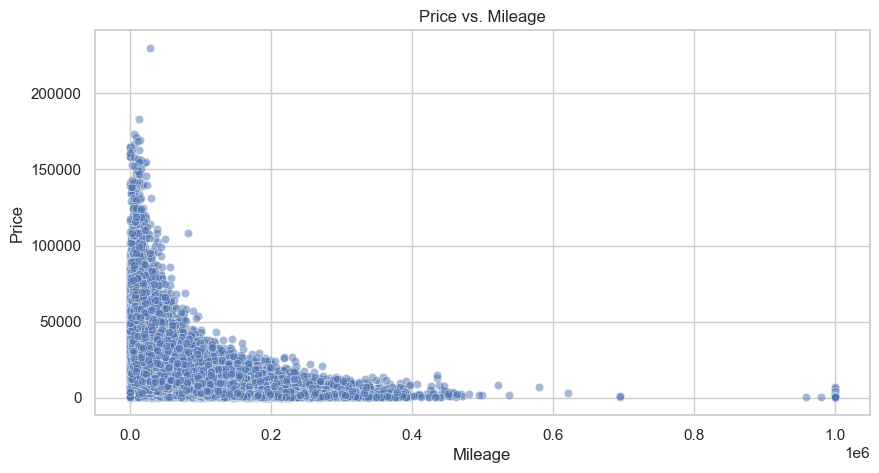

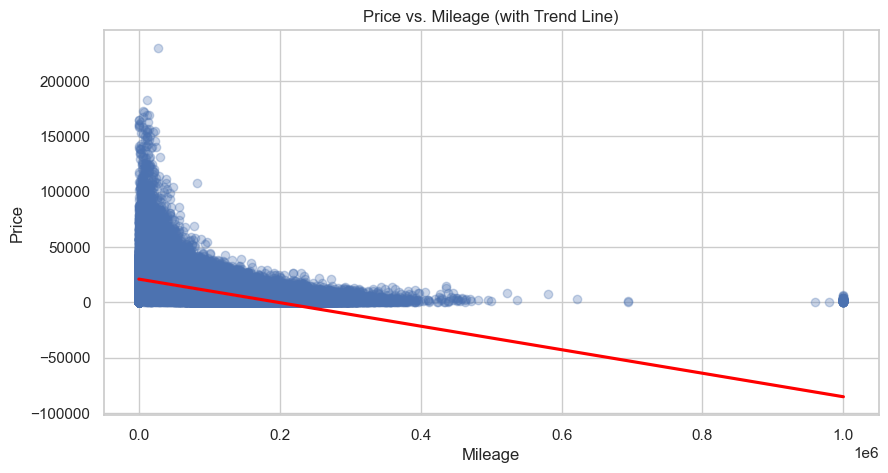

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['odometer'], y=df['sellingprice'], alpha=0.5)
plt.title("Price vs. Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

# Adding a regression line
plt.figure(figsize=(10,5))
sns.regplot(x=df['odometer'], y=df['sellingprice'], scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title("Price vs. Mileage (with Trend Line)")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

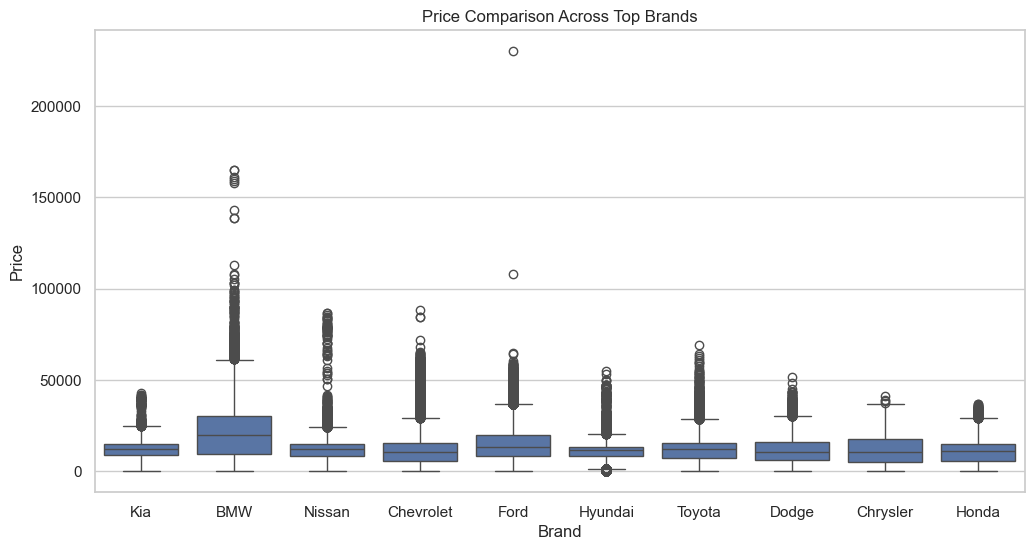

In [14]:
top_brands = df['make'].value_counts().index[:10]  # Select top 10 brands
df_top = df[df['make'].isin(top_brands)]

plt.figure(figsize=(12,6))
sns.boxplot(x='make', y='sellingprice', data=df_top)
plt.title("Price Comparison Across Top Brands")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=0)
plt.show()

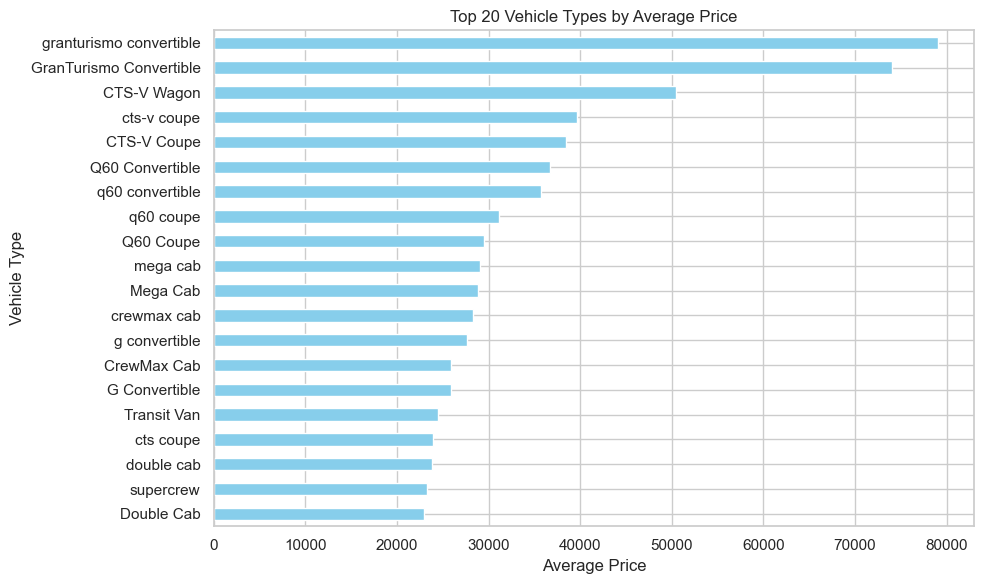

In [15]:
# Calculate the average price for each vehicle type, sorted by ascending price
vehicle_avg_price = df.groupby('body')['sellingprice'].mean().sort_values()

# Get the top 20 vehicle types by average price
top_20_vehicle_avg_price = vehicle_avg_price.tail(20)

# Plot the top 20 vehicle types
plt.figure(figsize=(10, 6))
top_20_vehicle_avg_price.plot(kind='barh', color='skyblue')
plt.title("Top 20 Vehicle Types by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()

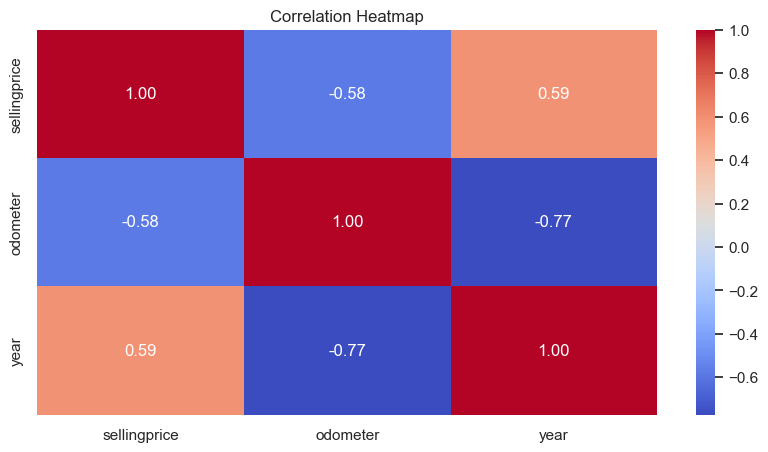

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['sellingprice', 'odometer', 'year']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
print(df['saledate'].head(10))

0    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2    Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3    Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4    Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5    Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6    Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7    Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8    Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9    Tue Jan 20 2015 04:00:00 GMT-0800 (PST)
Name: saledate, dtype: object


In [18]:
# Force 'saledate' to be datetime (ensure it's not string or object)
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)

# Convert to date (removes time & timezone)
df['saledate'] = df['saledate'].dt.date

C:\Users\Admin\AppData\Local\Temp\ipykernel_9608\2787770952.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)


In [19]:
# Convert 'saledate' to datetime, ensuring consistency
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)

# Extract only the date (removes time and timezone)
df['saledate'] = df['saledate'].dt.strftime('%Y-%m-%d')

# Convert back to datetime without time zone (ensures uniformity)
df['saledate'] = pd.to_datetime(df['saledate'])

In [20]:
print(df['saledate'].dtype)
print(df['saledate'].head())

datetime64[ns]
0   2014-12-16
1   2014-12-16
2   2015-01-14
3   2015-01-28
4   2014-12-18
Name: saledate, dtype: datetime64[ns]


In [21]:
df = df.dropna(subset=['saledate'])  # Remove rows where `saledate` is NaT
df['saledate'] = df['saledate'].dt.date  # Keep only YYYY-MM-DD format

In [22]:
# Step 1: Define the bins and labels
bins = [0, 9, 19, 29, 39, 49]  # Edges of the bins
labels = ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent']  # Category names

# Step 2: Create the new column using pd.cut
df['Condition_Category'] = pd.cut(df['condition'], bins=bins, labels=labels, right=True)

# Step 3: Verify the new column
print(df[['condition', 'Condition_Category']].head())

   condition Condition_Category
0        5.0          Very Poor
1        5.0          Very Poor
2       45.0          Excellent
3       41.0          Excellent
4       43.0          Excellent


In [23]:
# Step 1: Check for null values in the dataset
print(df.isnull().sum())

# Step 2: Drop rows with null values
df = df.dropna()

# Step 3: Verify if null values have been removed
print(df.isnull().sum())

# Optional: Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

year                      0
make                  10301
model                 10399
trim                  10651
body                  13195
transmission          65351
vin                       0
state                     0
condition             11794
odometer                 94
color                   749
interior                749
seller                    0
mmr                       0
sellingprice              0
saledate                  0
Condition_Category    11794
dtype: int64
year                  0
make                  0
model                 0
trim                  0
body                  0
transmission          0
vin                   0
state                 0
condition             0
odometer              0
color                 0
interior              0
seller                0
mmr                   0
sellingprice          0
saledate              0
Condition_Category    0
dtype: int64


In [24]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_vehicle_sales_data.csv', index=False)